In [13]:
import numpy as np
import matplotlib.pyplot as plt
# from numba import njit

In [7]:
# @njit #################### needs more testing, can do without error?
def b_maxL_3(m, t, C):
    mt = m[0] + m[1] + m[2]
    tt = t[0] + t[1] + t[2]
    Ct = C[0] + C[1] + C[2]
    a = -tt
    b = -tt*mt + Ct
    c = Ct*mt - C[0]*m[0] - C[1]*m[1] - C[2]*m[2] -tt*(m[0]*m[1] + m[1]*m[2] + m[2]*m[0])
    d = C[0]*m[1]*m[2] + C[1]*m[2]*m[0] + C[2]*m[0]*m[1] - tt*m[0]*m[1]*m[2]
    D0 = b**2 - 3*a*c
    D1 = 2*b**3 - 9*a*b*c + 27*(a**2)*d
        
    if D0 == 0. and D1 == 0.:
        return -b/(3*a)
    
    C0 = ((D1 + np.sqrt(D1**2 - 4*D0**3 + 0j)) / 2)**(1/3)
    
    if C0 == 0:
        C0 = ((D1 - np.sqrt(D1**2 - 4*D0**3 + 0j)) / 2)**(1/3)
        
    x0 = -1/(3*a) * (b + C0 + D0/C0)
    
    # if x0.real < 0:
    #     return 0.
    
    return x0

In [20]:
res = []
for i in range(10000):
    m = np.random.rand(3)*10
    t = np.random.rand(3)*1
    C = np.random.randint(0,100,3)
    res.append(b_maxL_3(m, t, C))


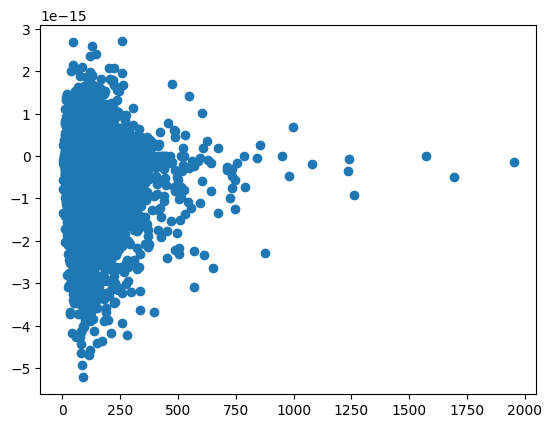

In [21]:
fig = plt.scatter(
    [i.real for i in res],
    [i.imag for i in res]
)


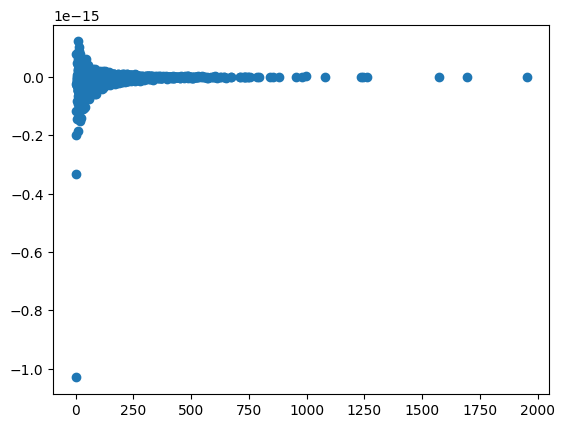

In [22]:
fig = plt.scatter(
    [i.real for i in res],
    [i.imag/i.real for i in res]
)


In [ ]:
def quartic_root(A, B, C, D, E):
    alpha = -3 * B**2 / (8 * A**2) + C/A
    beta = B**3 / (8 * A**3) - B * C / (2 * A**2) + D/A
    gamma = -3 * B**4 / (256 * A**4) + C * B**2 / (16 * A**3) - B * D / (4 * A**2) + E / A